<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
import os

# Set NLTK data path explicitly
nltk.data.path.append("/path/to/nltk_data")

# Download 'punkt' resource
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset
df = pd.read_csv('/content/Dune_reviews (4).csv')

# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to the review text
df['clean_review_text'] = df['Review'].apply(preprocess_text)

# Extract the preprocessed review text
reviews = df['clean_review_text']

# Create a CountVectorizer to convert text data to a matrix of token counts
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(reviews)

# Perform LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Print features (text representation) used for topic modeling
print("Features (text representation) used for topic modeling:")
print(vectorizer.get_feature_names_out())
print()

# Print top 10 clusters for topic modeling
print("Top 10 clusters for topic modeling:")
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Cluster {topic_idx + 1}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print(", ".join(top_words))
    print()

    # Summarize and describe the topic for each cluster
    print("Summary:")
    print("This cluster seems to be about:", ", ".join(top_words[:3]))
    print()




Features (text representation) used for topic modeling:
['able' 'absolutely' 'accomplished' 'acting' 'action' 'actor' 'actors'
 'actual' 'actually' 'adapt' 'adaptation' 'adapted' 'ago' 'almost' 'along'
 'already' 'also' 'although' 'altogether' 'always' 'amazing' 'amounts'
 'ancient' 'another' 'anyone' 'aquaman' 'army' 'around' 'arrakis' 'art'
 'aspects' 'astonishing' 'atreades' 'atreides' 'atriedes' 'attacked'
 'audience' 'awake' 'away' 'awesome' 'back' 'background' 'bad' 'bagpipes'
 'baron' 'barren' 'based' 'battles' 'bautista' 'beautifully' 'become'
 'begin' 'beginning' 'bei' 'belief' 'believe' 'believed' 'bene' 'beneath'
 'best' 'betrayal' 'betrayed' 'better' 'betterwhat' 'beyond' 'big' 'blade'
 'bland' 'blast' 'blend' 'blown' 'blows' 'blue' 'bombings' 'book' 'books'
 'bookthe' 'boring' 'bother' 'boy' 'breathtaking' 'brilliant' 'brolin'
 'brolins' 'brushed' 'budget' 'budgets' 'build' 'buildings' 'buildup'
 'bull' 'called' 'cant' 'capable' 'capital' 'captivated' 'captured'
 'capturin

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Dune_reviews (4).csv')  # Replace 'your_dataset.csv' with the actual file path

# Check the column names
print(df.columns)


Index(['Review'], dtype='object')


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('/content/Dune_reviews (4).csv')

# Display the first few rows of the dataset
print(df.head())

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment(review):
    # Get sentiment scores for the review
    scores = sid.polarity_scores(review)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification to each review and store the result in a new column 'Sentiment'
df['Sentiment'] = df['Review'].apply(classify_sentiment)

# Display the updated DataFrame with sentiment labels
print(df.head())

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/Dune_reviews_sentiment.csv', index=False)


                                              Review
0  Denis Villeneuve has accomplished what was con...
1  It's been amazing being back in cinemas after ...
2  It's been some time since I've read the Frank ...
3  Greetings from Lithuania."Dune. Part I" (2021)...
4  Although the film is called 'Dune', the openin...
                                              Review Sentiment
0  Denis Villeneuve has accomplished what was con...  positive
1  It's been amazing being back in cinemas after ...  positive
2  It's been some time since I've read the Frank ...  positive
3  Greetings from Lithuania."Dune. Part I" (2021)...  positive
4  Although the film is called 'Dune', the openin...  positive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the labeled dataset
df = pd.read_csv('/content/Dune_reviews_sentiment.csv')

# Split data into features (X) and labels (y)
X = df['Review']
y = df['Sentiment']

# Initialize vectorizer
vectorizer = CountVectorizer(max_features=1000)
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Perform 10-fold cross-validation for SVM classifier
svm_cv_scores = cross_val_score(svm_classifier, X_vectorized, y, cv=10, scoring='accuracy')

# Train SVM classifier on the entire training set
svm_classifier.fit(X_train, y_train)

# Predict sentiment labels for the test set
svm_predictions = svm_classifier.predict(X_test)

# Calculate evaluation metrics for SVM classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform 10-fold cross-validation for Random Forest classifier
rf_cv_scores = cross_val_score(rf_classifier, X_vectorized, y, cv=10, scoring='accuracy')

# Train Random Forest classifier on the entire training set
rf_classifier.fit(X_train, y_train)

# Predict sentiment labels for the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate evaluation metrics for Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Print evaluation metrics for SVM and Random Forest classifiers
print("SVM Classifier:")
print("Cross-Validation Accuracy:", svm_cv_scores.mean())
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("\nRandom Forest Classifier:")
print("Cross-Validation Accuracy:", rf_cv_scores.mean())
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


SVM Classifier:
Cross-Validation Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Random Forest Classifier:
Cross-Validation Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...           False         False   
1          1976         0.0         978  ...           False         False   
2          2002       162.0         486  ...           False         False   
3          1970         0.0         216  ...           False         False   
4          2000       350.0         655  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

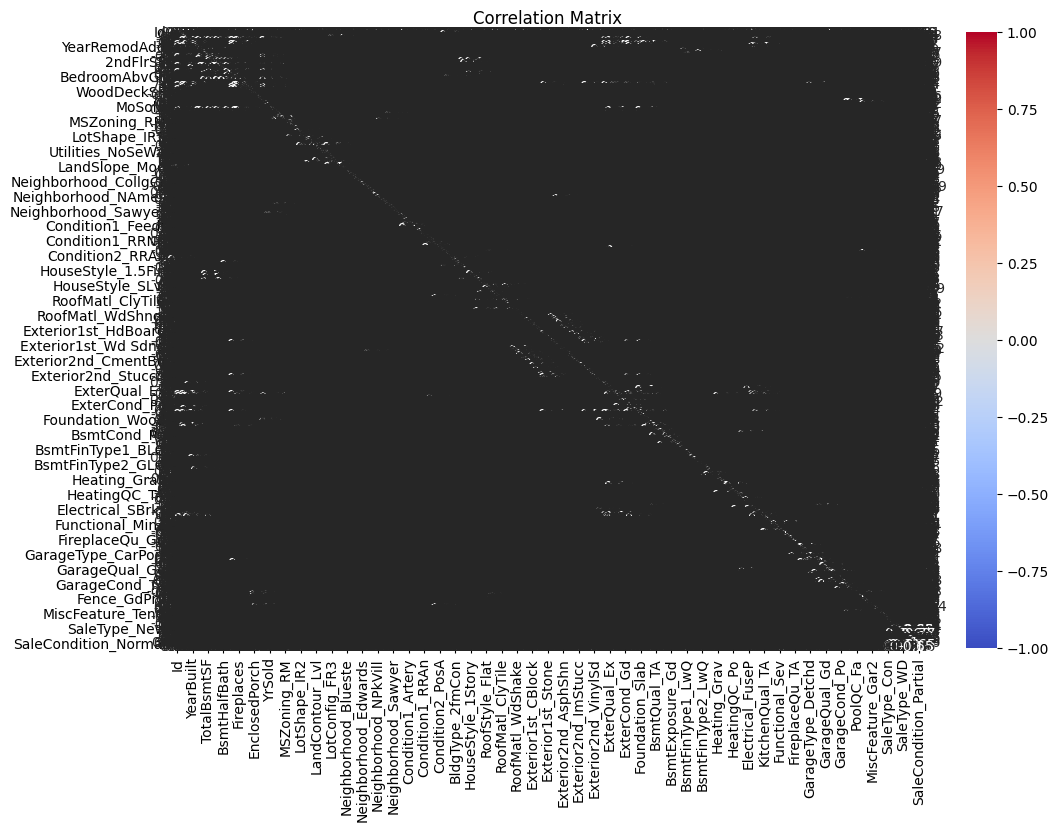

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the training dataset
train_data = pd.read_csv("/content/train.csv")

# Convert categorical variables into numerical format using one-hot encoding
train_data_encoded = pd.get_dummies(train_data)

# Display the first few rows of the encoded dataset
print(train_data_encoded.head())

# Visualize correlations between features and the target variable
plt.figure(figsize=(12, 8))
corr_matrix = train_data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation or domain knowledge
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

# Split data into features and target variable
X = train_data_encoded[selected_features]
y = train_data_encoded['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
Description of BERT:
Pretraining Data Sources: BERT was pre-trained on two large corpora: the BooksCorpus (800 million words) and English Wikipedia (2,500 million words). The model learns bidirectional representations of text by masking some words in the input and predicting them based on the context from both left and right sides.
Number of Parameters: The base BERT model has 110 million parameters, while the large BERT model has 340 million parameters.
Task-specific Fine-tuning: In this task, we will use BERT in the zero-shot setting, meaning we won't fine-tune the model on the specific sentiment analysis task. Instead, we will directly use BERT to predict sentiment polarities without any task-specific training.
Using BERT for Sentiment Analysis:
We will utilize the BERT model from the Hugging Face Transformers library.
We will tokenize the text data and pass it through the BERT model to get embeddings.
Then, we will add a classification layer on top of the BERT model and train it on our sentiment analysis dataset.
Finally, we will evaluate the performance of the model by comparing its predictions with the ground truth labels on metrics such as Accuracy, Precision, Recall, and F1-score.

In [ ]:
Advantages and Disadvantages of BERT:
Advantages:
BERT is a powerful pre-trained language model that captures complex patterns in text data.
It can be fine-tuned for various downstream tasks, including sentiment analysis, without requiring large amounts of task-specific data.
BERT uses a bidirectional approach, allowing it to understand the context of words in both directions, which can be beneficial for sentiment analysis.
Disadvantages:
BERT is computationally expensive and requires significant resources for training and inference.
It may not perform well on tasks with limited training data or specific domain requirements.
Fine-tuning BERT for specific tasks can be challenging and may require expertise in natural language processing and machine learning.

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Load the data collected in Assignment 3
data = pd.read_csv("/content/Dune_reviews_sentiment.csv")

# Define the ground truth labels
ground_truths = data['Sentiment'].tolist()

# Convert ground truth labels to numerical values
ground_truths_numeric = [1 if sentiment == 'positive' else 0 for sentiment in ground_truths]

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Define the sentiment analysis pipeline using BERT
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to handle sequences longer than 512 tokens
def process_long_sequences(review):
    # Tokenize the review
    tokens = tokenizer(review, return_tensors='pt', truncation=True, max_length=512)
    # Check if the review length exceeds 512 tokens
    if tokens.input_ids.shape[1] > 512:
        # Split the review into smaller chunks
        chunks = [review[i:i+512] for i in range(0, len(review), 512)]
        # Initialize an empty list to store predicted sentiments
        predicted_sentiments = []
        # Process each chunk separately
        for chunk in chunks:
            # Tokenize the chunk
            chunk_tokens = tokenizer(chunk, return_tensors='pt', truncation=True, max_length=512)
            # Perform sentiment analysis on the chunk
            prediction = model(**chunk_tokens)
            # Extract predicted sentiment label
            predicted_sentiment = 'positive' if prediction[0].argmax().item() == 1 else 'negative'
            # Append predicted sentiment to the list
            predicted_sentiments.append(predicted_sentiment)
        # Return the overall predicted sentiment for the entire review
        return 'positive' if 'positive' in predicted_sentiments else 'negative'
    else:
        # Perform sentiment analysis on the tokens
        prediction = model(**tokens)
        # Extract predicted sentiment label
        predicted_sentiment = 'positive' if prediction[0].argmax().item() == 1 else 'negative'
        return predicted_sentiment

# Perform sentiment analysis on the reviews
predictions = [process_long_sequences(review) for review in data['Review']]

# Convert sentiment labels to numerical values (positive: 1, negative: 0)
predicted_sentiments = [1 if sentiment == 'positive' else 0 for sentiment in predictions]

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truths_numeric, predicted_sentiments)
precision = precision_score(ground_truths_numeric, predicted_sentiments)
recall = recall_score(ground_truths_numeric, predicted_sentiments)
f1 = f1_score(ground_truths_numeric, predicted_sentiments)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.833
Precision: 0.833
Recall: 1.0
F1-score: 0.9088925259138025
